# Elephant Habitat Suitability Model - Background

In [1]:
import datacube

from deafrica_tools.plotting import display_map

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Background

Habitat Suitability Models (HSMs) enable estimation of habitats suitable and quality of those habitats for certain species in space. This example uses rules defined for African elephants based on research conducted by Rachael Gross and Matthew Gale from the Australian National University. 

The final HSM illustrates the suitability of locations in space for elephant habitat on a scale of 0-1. It is calculated from four sub-models relating to:
   1. Forests
   2. Other vegetation
   3. Human presence
   4. Seasonal water
   5. Permanent water
   
Each of the sub-models are calculated from products listed in the tables below. For each data layer, the Euclidean Distance (ED) to features (e.g. forests, water, roads) is calculated for all locations in the area of interest and standardised to range from 0-1. We use ED to turn the data from a binary presence/absence model to a scale. For example, without running ED, an elephant could be standing next to a body of water and it would not be suitable habitat because they are not in the water which is not reflective of reality. Desirable locations, such as water bodies or forests, are allocated a value of 1, while locations distant from such features have values closer to 0 which is on a scale, i.e. the closer an elephant is to water, the better the habitat is. The opposite is true for the human presence sub-model where features such as urban centres are given a value of 0, as these are considered undesirable for elephant habitat. This methodology is a variation of [fuzzy representation of boundaries](https://www.tandfonline.com/doi/abs/10.1080/02693799608902098) which is an method established in GIS applications. 

The sub-models and the final model are calculated using Weighted Linear Combination, which is a [widely applied method in GIS analyses](https://onlinelibrary.wiley.com/doi/10.1111/1467-9671.00035).

The method works by applying different weightings to spatial layers to be combined. The weights are determined by researchers' domain knowledge and existing scientific knowledge, in this case on habitat preferences for elephants. The model initially merges similar variables into sub-models, before the sub-models are combined into the final model. The mindmap below shows the way all of the variables are weighted and merged. Please note that each sub-model has a combined value of 100% before being assigned a new value for the final model that should also equal 100.
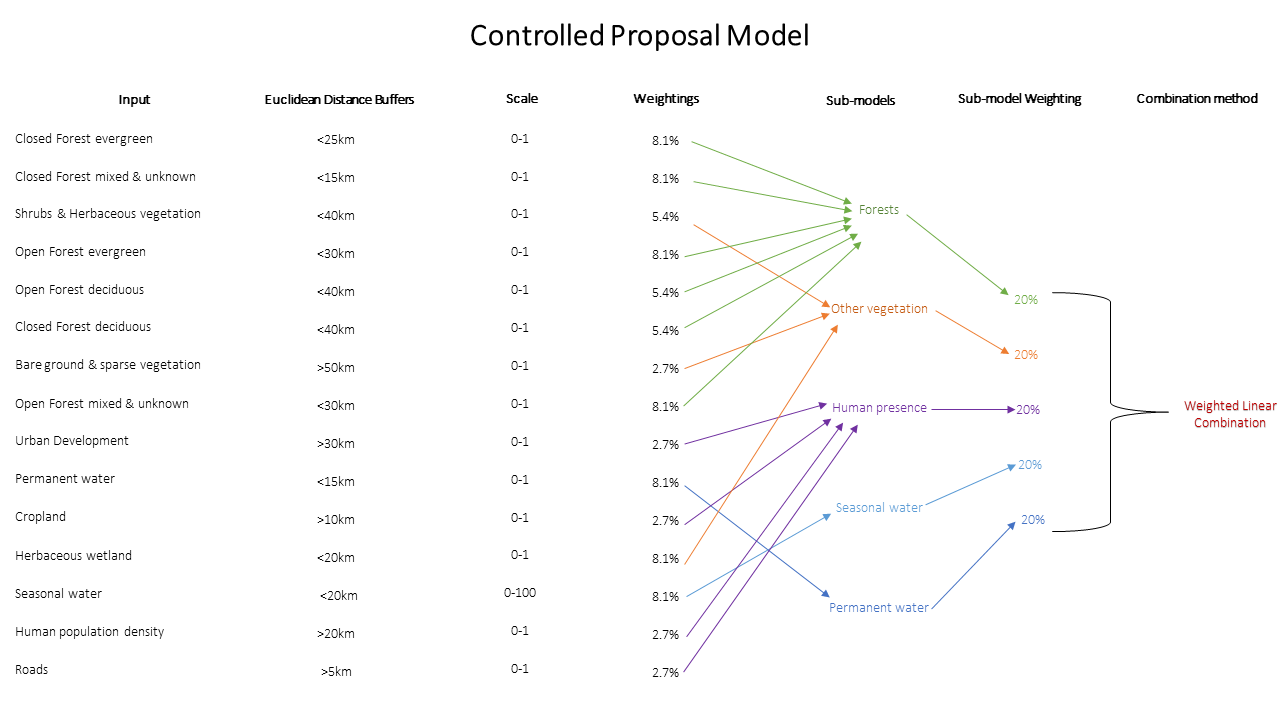

The tables below shows data products used for the sub-models, weightings of each sub-model layer, and weighting of each sub-model in the final model.

## Sub-models

### Forest
Data layer | Layer weighting |
-----------: | -----------: |
Closed forest evergreen (CGLS 111 & 112) | 16.7% | 
Closed forest mixed (CGLS 115 & 116) | 16.7% |
Open forest evergreen (CGLS 121 & 122) | 16.7% | 
Open forest deciduous (CGLS 123 & 124) | 16.7% |
Closed forest deciduous (CGLS 113 & 114) | 16.7% |
Open forest mixed (CGLS 125 & 126) | 16.7% |

### Other vegetation
Data layer | Layer weighting |
-----------: | -----------: |
Shrubs & herbaceous vegetation (CGLS 20 & 30) | 33.3% | 
Bare ground (CGLS 60) | 33.3% |
Herbaceous wetland (CGLS 90) | 33.3% |

### Human presence
Data layer | Layer weighting |
-----------: | -----------: |
Urban development (CGLS 50) | 25% | 
Cropland (CGLS 40) | 25% |
Human population density | 25% |
Roads | 25% |

### Seasonal water
Data layer | Layer weighting |
-----------: | -----------: |
Seasonal water | 100% |

### Permanent water
Data layer | Layer weighting |
-----------: | -----------: |
Permanent water | 100% |

## Final Model

Sub-model | Layer weighting |
-----------: | -----------: |
Forests | 20% | 
Other vegetation | 20% |
Human presence | 20% |
Seasonal water | 20% |
Permanent water | 20% |

# Workflow design

This use case divides the workflows into separate Jupyter Notebooks for each of the sub-models, then a final notebook calculates and presents the habitat suitability model.

To run the entire workflow, each notebook must be run in its entirety. 

## Define area

We will define an area of interest and store the details so it can be easily referred to in subsequent notebooks.

This workflow brings in data at 200m resolution, so it can handle reasonably large areas spanning several hundreds of kilometres. If you are interested in running the workflow for a different area, you might consider adjusting the resolution of input products, noting the native resolution of CGLS landcover (the main product this workflow draws upon) is 100m. The below test area is over Namibia, focussing on Etosha National Park. 

In [2]:
lat, lon = -19.26, 17.68

buffer = 3

#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

%store lons
%store lats

display_map(x=lons, y=lats)

Stored 'lons' (tuple)
Stored 'lats' (tuple)


---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [3]:
print(datacube.__version__)

1.8.8


**Last Tested:**

In [4]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-04-13'